In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([.2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x))))T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

SyntaxError: invalid syntax (ipython-input-1807780757.py, line 6)

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Nachylenie (a): 2.459
Wyraz wolny (b): 10.349


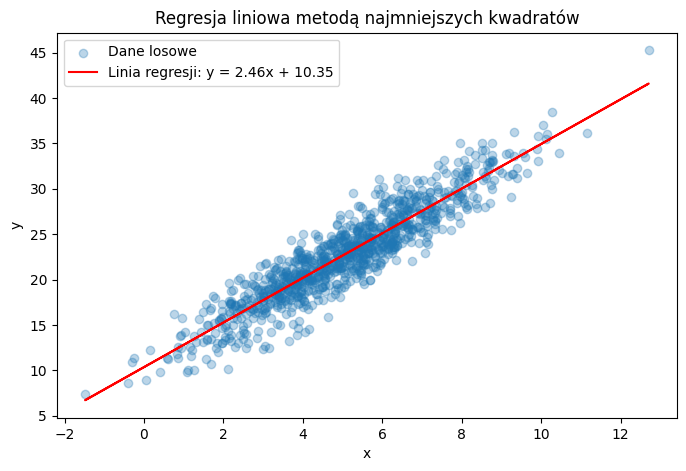

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

np.random.seed(42)
x = np.random.normal(5, 2, 1000)
true_a = 2.5
true_b = 10
noise = np.random.normal(0, 2, 1000)
y = true_a * x + true_b + noise

X = np.vstack((x, np.ones(len(x)))).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b = beta

print(f"Nachylenie (a): {a:.3f}")
print(f"Wyraz wolny (b): {b:.3f}")

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.3, label='Dane losowe')
plt.plot(x, a * x + b, color='red', label=f'Linia regresji: y = {a:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa metodą najmniejszych kwadratów')
plt.legend()
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Saving LungDisease.csv to LungDisease (11).csv
Podpunkt 1



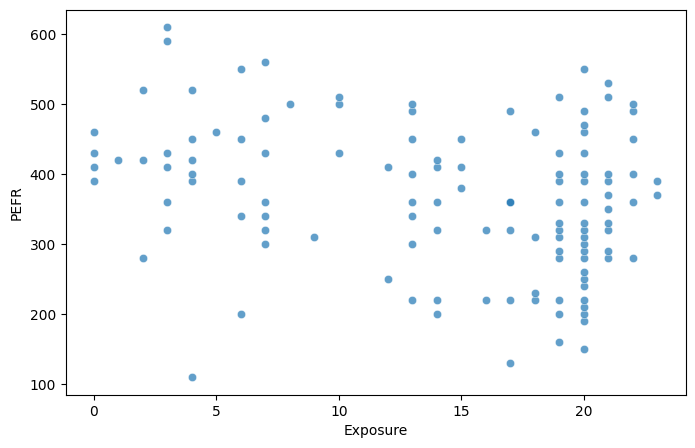


Podpunkt 2


__________________________________________________________

Współczynnik korelacji Pearsona -0.2770217010684071

__________________________________________________________




Podpunkt 3

Nachylenie (a): -4.185
Wyraz wolny (b): 424.583


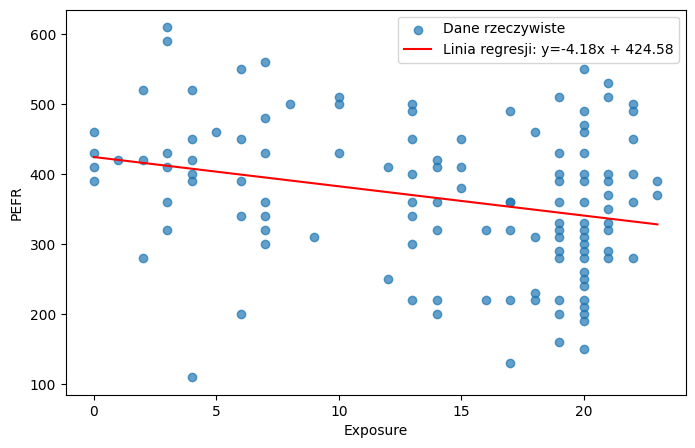

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('LungDisease.csv')

# Podpunkt 1
print("\nPodpunkt 1\n")
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Exposure', y='PEFR', alpha=0.7)
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

# Podpunkt 2
print("\nPodpunkt 2\n")
x = df['Exposure'].values
y = df['PEFR'].values

mean_x = np.mean(x)
mean_y = np.mean(y)

cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

pearson_coefficient = cov_xy / (std_x * std_y)

print(f"""\n__________________________________________________________\n
Współczynnik korelacji Pearsona {pearson_coefficient}\n
__________________________________________________________\n\n\n""")

# Podpunkt 3
print("\nPodpunkt 3\n")
X = np.vstack((x, np.ones(len(x)))).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b = beta

print(f"Nachylenie (a): {a:.3f}")
print(f"Wyraz wolny (b): {b:.3f}")

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7, label='Dane rzeczywiste')
plt.plot(x, a * x + b, color='red', label=f'Linia regresji: y={a:.2f}x + {b:.2f}')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.legend()
plt.show()

# Podpunkt 4
# Dzięki dopasowaniu prostej regresji liniowej bardzo łatwo zauważalne jest, że
# w ciągu mijających lat (EXPOSURE) zmniejsza się szczytowy przepływ wydechowy (PERF)

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Saving anscombe.csv to anscombe (12).csv
      x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89


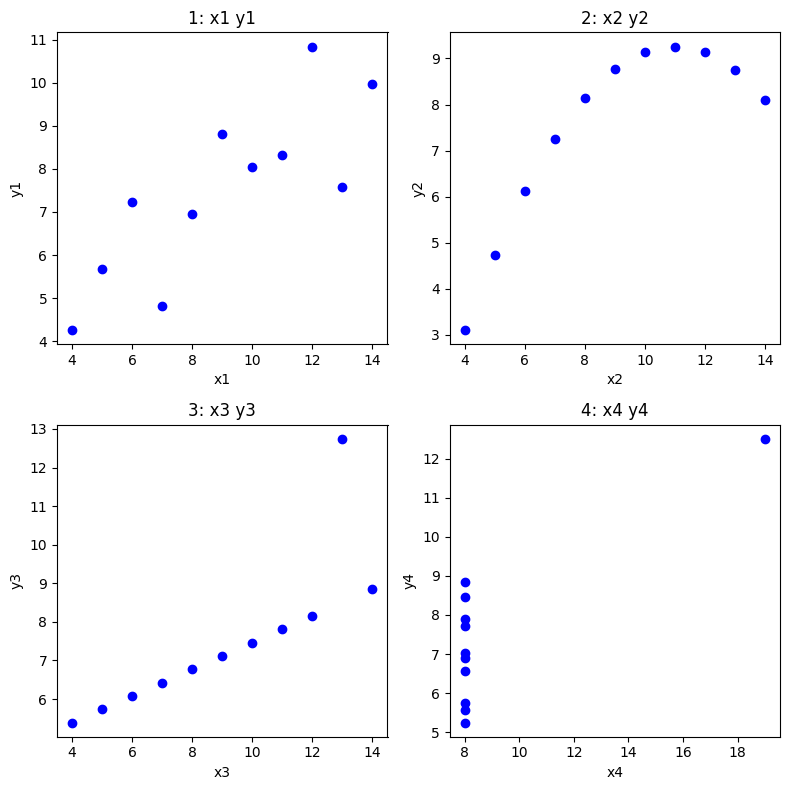

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from google.colab import files

# Podpunkt 1
uploaded = files.upload()
df = pd.read_csv('anscombe.csv', skiprows=1)

num_pairs = df.shape[1] // 2
new_columns = []
for i in range(num_pairs):
    new_columns.extend([f'x{i+1}', f'y{i+1}'])

df.columns = new_columns
print(df)

# Podpunkt 2

fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.flatten()

for i in range(4):
    x_col = f'x{i+1}'
    y_col = f'y{i+1}'
    axes[i].scatter(df[x_col], df[y_col], color='blue')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{x_col} {y_col}')

plt.tight_layout()
plt.show()